In [0]:
!git clone https://github.com/DhananjayU/dataset

Cloning into 'dataset'...
remote: Enumerating objects: 87077, done.
remote: Counting objects: 100% (87077/87077), done.
remote: Compressing objects: 100% (87045/87045), done.
remote: Total 87077 (delta 30), reused 87074 (delta 27), pack-reused 0
Receiving objects: 100% (87077/87077), 1.01 GiB | 41.52 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Checking out files: 100% (78000/78000), done.


In [0]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Flatten
from keras.regularizers import l2
from keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

import os
import cv2
import matplotlib.pyplot as plt

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu',kernel_regularizer=l2(0.001), input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5,5), kernel_regularizer=l2(0.001),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5,5), kernel_regularizer=l2(0.001),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(5,5), kernel_regularizer=l2(0.001),activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(5,5), kernel_regularizer=l2(0.001),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation = 'softmax'))


In [0]:
#os.chdir("/content/dataset/asl_alphabet_train/asl_alphabet_train/")
cvscores = []
data_path=""

In [0]:
# train_datagen = ImageDataGenerator(validation_split = 0.2)

# train_generator = train_datagen.flow_from_directory(data_path,
#                                                   target_size = (224,224),
#                                                   color_mode = 'grayscale',
#                                                   batch_size = 8,
#                                                   class_mode = 'sparse',
#                                                   shuffle = True,
#                                                   subset = 'training')
# validation_generator = train_datagen.flow_from_directory('./',
#                                                   target_size = (224,224),
#                                                   color_mode = 'grayscale',
#                                                   batch_size = 8,
#                                                   class_mode = 'sparse',
#                                                   shuffle = True,
#                                                   subset = 'validation')

KeyboardInterrupt: ignored

In [0]:
# os.chdir("dataset/asl_alphabet_train/asl_alphabet_train/")
# k fold validation
for k in range(1):
  train_datagen = ImageDataGenerator(validation_split = 0.2)

  train_generator = train_datagen.flow_from_directory(data_path,
                                                    target_size = (224,224),
                                                    color_mode = 'grayscale',
                                                    batch_size = 8,
                                                    class_mode = 'sparse',
                                                    shuffle = True,
                                                    subset = 'training')
  validation_generator = train_datagen.flow_from_directory(data_path,
                                                    target_size = (224,224),
                                                    color_mode = 'grayscale',
                                                    batch_size = 8,
                                                    class_mode = 'sparse',
                                                    shuffle = True,
                                                    subset = 'validation')
  model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam', metrics=['accuracy'])
  
  step_size_train = train_generator.n//train_generator.batch_size
  
  model.fit_generator(generator = train_generator, steps_per_epoch = step_size_train, epochs=7, verbose=1)
  
  scores = model.evaluate_generator(generator = validation_generator,verbose=1)
  
  print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))
  
  cvscores.append(scores[1]*100)
  
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores),np.std(cvscores)))

Found 56160 images belonging to 26 classes.
Found 14040 images belonging to 26 classes.
Epoch 1/7
 577/7020 [=>............................] - ETA: 3:02 - loss: 3.9774 - acc: 0.0698

KeyboardInterrupt: ignored

In [0]:
print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))
  
cvscores.append(scores[1]*100)

acc: 80.35%


In [0]:
import cv2
import numpy as np

images=[]
labels=[]
for i in os.listdir(data_path+"../test"):
  img=cv2.imread(i,0)
  images.append(cv2.resize(img,(224,224)))
  labels.append(ord(i[0])-65)

images=np.array(images)
labels=np.array(labels)

print(images.shape)
print(labels.shape)

model.evaluate(x=images.reshape(7800,224,224,1),y=labels)

(7800, 224, 224)
(7800,)


7800/7800 [==============================] - 10s 1ms/sample - loss: 0.6047 - acc: 0.9331


[0.6047287688194177, 0.9330769]

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pwd

/content/dataset/asl_alphabet_train/test


In [0]:
model.save("../../../gdrive/My Drive/78000model.h5")

In [0]:
model.save_weights("../../../gdrive/My Drive/78000weights.h5")

In [0]:
images=np.load("../../../gdrive/My Drive/realimages.npy")
labels=np.load("../../../gdrive/My Drive/reallabels.npy")
model.evaluate(x=images.reshape(images.shape[0],224,224,1),y=labels)

107/107 [==============================] - 0s 3ms/sample - loss: 6.2156 - acc: 0.2430


[6.21562453296697, 0.24299066]

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


(107, 224, 224)
(26,)
P


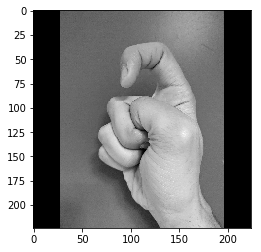

In [0]:
from tensorflow.keras.models import load_model
import keras
import numpy as np
import matplotlib.pyplot as plt
images=np.load("gdrive/My Drive/realimages.npy")
labels=np.load("gdrive/My Drive/reallabels.npy")
model=load_model("gdrive/My Drive/78000model.h5")
plt.imshow(images[10],cmap="gray")
print(images.shape)
arr=model.predict(images[10].reshape(1,224,224,1)).reshape(26)
print(arr.shape)
mx=np.max(arr)
for i in range(len(arr)):
  if mx==arr[i]:
    print(chr(i+65))
    break

In [0]:

def model_predict(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  arr=model.predict(img.reshape(1,224,224,1)).reshape(26)
  mx=np.max(arr)
  for i in range(len(arr)):
    if mx==arr[i]:
      return chr(i+65)
      
  

In [0]:
import cv2
import sys
from google.colab.patches import cv2_imshow

video_capture = cv2.VideoCapture(0)
x1 = 300
y1 = 100
x2 = 524
y2 = 324
count = 1

#frames =[]
#while (video_capture.isOpened()):
while(True):
    # Capture frame-by-frame
    frameId = video_capture.get(1)
    ret, frame = video_capture.read()
    frame = cv2.flip(frame,1)
    cv2.rectangle(frame,(x1, y1),(x2, y2),(255,0,0), 2)
    cv2_imshow(frame)
    crop_img = frame[100:324,300:524]
    
    if(frameId % 271 == 0):
    
    #frames.append(frame)
        
        print(model_predict(crop_img));

    count+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()




AttributeError: ignored

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

images=np.load("/content/gdrive/My Drive/realimages.npy")
labels=np.load("/content/gdrive/My Drive/reallabels.npy")


In [0]:
labels

array([ 6, 17, 20,  3,  7,  8, 11, 13,  5, 14, 23,  7,  2,  3,  0,  8, 21,
       19, 24, 24,  9,  4, 15,  7, 17, 15, 15, 16, 25, 22, 21,  3,  6, 17,
       19,  1, 21, 23,  5, 13, 16,  5, 25, 23, 20, 10,  2,  5,  0,  2,  1,
        8, 18, 17,  0,  4, 15, 18, 14, 20,  3,  1,  8,  6,  1, 25, 22, 22,
        2, 13, 11,  2, 10, 11,  9, 14, 19, 12,  7, 20,  6, 12,  4,  0,  1,
       22, 21, 10, 12, 16, 23, 24, 13, 11,  1, 19, 12, 10,  3, 18, 16,  0,
        4, 18, 18, 24, 25])

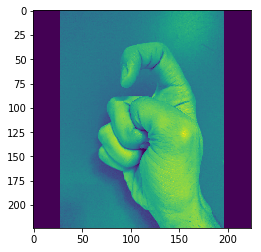

23


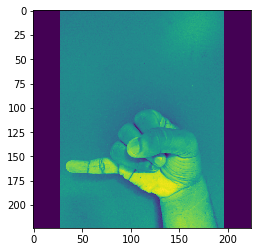

9


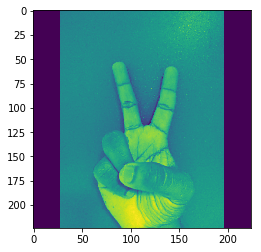

21


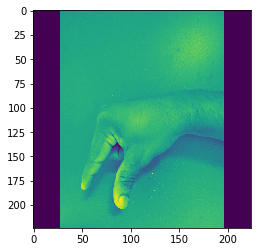

16


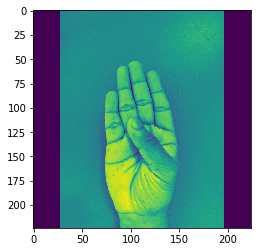

1


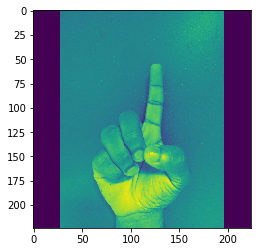

3


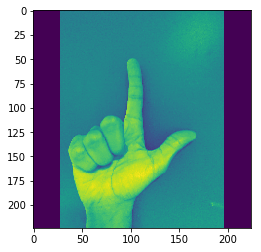

11


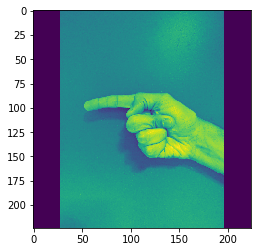

6


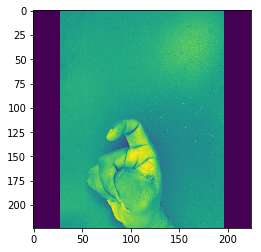

23


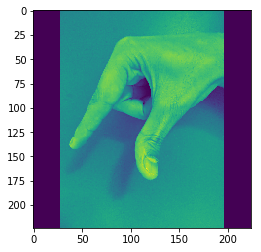

16


In [0]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.imshow(images[10+i*10])
  plt.show()
  print(labels[10+i*10])

In [0]:
from sklearn.metrics import f1_score
model.load_weights("/content/gdrive/My Drive/78000weights.h5")
yhat_classes=model.predict_classes(images.reshape(107,224,224,1))
f1 = f1_score(labels, yhat_classes,average="weighted")
print('F1 score: %f' % f1)


F1 score: 0.196479


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
